In [4]:
ticker = "spy.us"
url = f"https://stooq.com/q/d/l/?s={ticker}&i=d"
df = pd.read_csv(url)
df.head()


,Date,Open,High,Low,Close,Volume
0,2005-02-25,92.7949,93.8716,92.7097,93.6948,79289004
1,2005-02-28,93.4735,93.5952,92.6083,93.0544,89985785
2,2005-03-01,93.1845,93.7683,93.1845,93.5386,61658442
3,2005-03-02,93.1749,94.0766,93.0735,93.4927,83253671
4,2005-03-03,93.8716,94.0575,93.1203,93.5301,80491538


In [5]:
import pandas as pd

tickers = [
    "SPY","AAPL","MSFT","AMZN","NVDA","GOOGL","META","JPM","XOM","JNJ",
    "PG","KO","PEP","WMT","COST","HD","V","MA","UNH","LLY"
]

def fetch_close_stooq(ticker):
    t = ticker.lower() + ".us"
    url = f"https://stooq.com/q/d/l/?s={t}&i=d"
    df = pd.read_csv(url)
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").set_index("Date")
    return df[["Close"]].rename(columns={"Close": ticker})

prices = pd.concat([fetch_close_stooq(t) for t in tickers], axis=1)

prices.tail()


,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,META,JPM,XOM,JNJ,PG,KO,PEP,WMT,COST,HD,V,MA,UNH,LLY
Date,,,,,,,,,,,,,,,,,,,,
2026-01-09,694.07,259.37,479.280,247.38,184.86,328.57,653.06,329.19,124.610,204.39,141.87,70.5100,139.9100,114.530,924.88,374.64,349.77,575.54,343.98,1063.56
2026-01-12,695.16,260.25,477.180,246.47,184.94,331.86,641.97,324.49,124.030,209.72,143.46,70.5000,141.3600,117.970,943.08,374.94,343.20,566.28,340.51,1081.00
2026-01-13,693.77,261.05,470.670,242.60,185.81,335.97,631.09,310.90,126.540,213.65,144.24,71.2400,143.4800,120.360,941.93,379.74,327.88,544.99,333.93,1077.19
2026-01-14,690.36,259.96,459.380,236.65,183.14,335.84,615.52,307.87,130.200,218.55,146.35,71.4400,145.9200,120.040,950.98,375.95,329.17,546.82,334.96,1073.29
2026-01-15,694.45,258.62,457.205,238.34,188.86,333.48,621.47,311.06,129.875,219.24,144.98,70.6146,146.8499,119.645,954.41,379.34,327.86,541.69,337.61,1035.00


In [6]:
import numpy as np

rets = prices.pct_change()

window = 20
mu = rets.rolling(window).mean()
sigma = rets.rolling(window).std()
z = (rets - mu) / sigma
z.tail()


,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,META,JPM,XOM,JNJ,PG,KO,PEP,WMT,COST,HD,V,MA,UNH,LLY
Date,,,,,,,,,,,,,,,,,,,,
2026-01-09,1.072949,0.698031,0.260242,0.071908,-0.075219,0.602039,0.945707,-0.393929,0.661178,-0.613915,0.141806,1.453635,0.795038,1.173934,0.537569,2.519479,-0.677315,-0.860153,-0.772831,-1.273201
2026-01-12,0.196862,0.935933,-0.433088,-0.489662,-0.044296,0.558603,-1.379106,-1.288709,-0.377360,2.371560,0.883249,-0.113628,1.354933,2.504938,1.134527,-0.113498,-2.012562,-1.769375,-0.826823,0.692912
2026-01-13,-0.565819,0.865800,-1.441133,-1.329961,0.092469,0.672522,-1.331432,-2.656876,0.942649,1.558213,0.439125,1.023747,1.753397,1.532617,-0.309466,0.661178,-3.127271,-2.954929,-1.378584,-0.331788
2026-01-14,-1.074857,-0.232794,-2.188602,-1.820519,-0.943678,-0.394311,-1.706888,-0.514586,1.276394,1.754260,1.282079,0.252627,1.741988,-0.336212,0.358948,-0.834890,0.480886,0.441249,0.294818,-0.255820
2026-01-15,0.901781,-0.330571,-0.268192,0.236446,1.510419,-0.931908,0.974462,0.714159,-0.516471,0.069790,-0.829992,-1.200584,0.690684,-0.434636,-0.132719,0.354772,-0.112105,-0.601100,0.583225,-1.885630


In [7]:
entry_z = -2.0

signal = (z < entry_z).astype(int)
pos = signal.shift(1).fillna(0)

# per-asset strategy returns
strat_rets = pos * rets

# equal-weight across tickers each day (ignore NaNs)
port_ret = strat_rets.mean(axis=1)

port_ret.tail()


Date
2026-01-09    0.000000
2026-01-12    0.000000
2026-01-13   -0.002232
2026-01-14   -0.000123
2026-01-15   -0.000237
dtype: float64

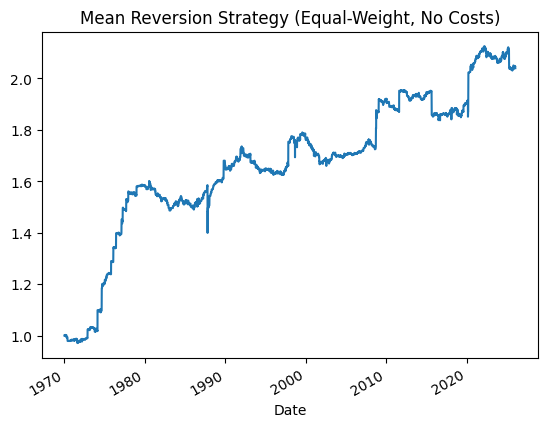

In [8]:
import matplotlib.pyplot as plt

equity = (1 + port_ret.fillna(0)).cumprod()

equity.plot(title="Mean Reversion Strategy (Equal-Weight, No Costs)")
plt.show()


In [9]:
r = port_ret.dropna()

# Annualized Sharpe (assumes ~252 trading days)
sharpe = (r.mean() / r.std()) * np.sqrt(252)

# Max drawdown from equity curve
equity = (1 + r).cumprod()
running_max = equity.cummax()
drawdown = equity / running_max - 1
max_dd = drawdown.min()

sharpe, max_dd


(0.3722499624498247, -0.12613171604479845)

In [29]:
def build_position_from_z(z_series, entry_z, exit_z):
    pos = 0
    out = []
    for z in z_series:
        if pos == 0 and z < entry_z:
            pos = 1
        elif pos == 1 and z > exit_z:
            pos = 0
        out.append(pos)
    return pd.Series(out, index=z_series.index)

In [10]:
def backtest_mean_reversion(prices, window, entry_z):
    rets = prices.pct_change()
    mu = rets.rolling(window).mean()
    sigma = rets.rolling(window).std()
    z = (rets - mu) / sigma

    signal = (z < entry_z).astype(int)
    pos = signal.shift(1).fillna(0)

    strat_rets = pos * rets
    port_ret = strat_rets.mean(axis=1).dropna()

    equity = (1 + port_ret).cumprod()
    running_max = equity.cummax()
    dd = equity / running_max - 1

    sharpe = (port_ret.mean() / port_ret.std()) * np.sqrt(252)
    max_dd = dd.min()

    return sharpe, max_dd

rows = []
for window in [20, 60]:
    for entry_z in [-1.5, -2.0, -2.5]:
        sharpe, max_dd = backtest_mean_reversion(prices, window, entry_z)
        rows.append({"window": window, "entry_z": entry_z, "sharpe": sharpe, "max_dd": max_dd})

results = pd.DataFrame(rows).sort_values("sharpe", ascending=False)
results


,window,entry_z,sharpe,max_dd
0,20,-1.5,0.478905,-0.203346
3,60,-1.5,0.432439,-0.236149
4,60,-2.0,0.419934,-0.217914
5,60,-2.5,0.401745,-0.158175
2,20,-2.5,0.378230,-0.075555
1,20,-2.0,0.372250,-0.126132


In [34]:
PARAM_GRID = [(20, -1.5), (20, -2.0), (20, -2.5),
              (60, -1.5), (60, -2.0), (60, -2.5)]
exit_z = -1.0
def compute_port_ret(prices_slice, window, entry_z, cost_per_side = 0.0005, return_turnover = False):
    rets = prices_slice.pct_change()
    mu = rets.rolling(window).mean()
    sigma = rets.rolling(window).std()
    z = (rets - mu) / sigma

    sma100 = prices_slice.rolling(100).mean()
    trend_ok = prices_slice > sma100
    signal = ((z < entry_z) & trend_ok).astype(int)
    raw_pos = z.apply(lambda col: build_position_from_z(col, entry_z, exit_z))
    pos = raw_pos.shift(1).fillna(0)


    turnover = pos.diff().abs().fillna(0)
    port_turnover = turnover.mean(axis=1)

    cost_per_side = 0.0005  # 5 bps
    cost = turnover * cost_per_side

    strat_rets_net = pos * rets - cost
    port_ret_net = strat_rets_net.mean(axis=1)

    strat_rets = pos * rets
    port_ret = strat_rets.mean(axis=1)
    if return_turnover:
        return port_ret_net, port_turnover
    return port_ret_net

def sharpe_from_returns(r):
    r = r.dropna()
    if r.std() == 0 or len(r) < 50:
        return -np.inf
    return (r.mean() / r.std()) * np.sqrt(252)

train_len = 504
test_len = 63

dates = prices.index
oos_returns = []
chosen_params = []
oos_turnovers = []

start = 0
while start + train_len + test_len <= len(dates):
    train_idx = dates[start : start + train_len]
    test_idx  = dates[start + train_len : start + train_len + test_len]

    train_prices = prices.loc[train_idx]
    hist_prices = prices.loc[train_idx.union(test_idx)]

    # select best params on train
    best_s = -np.inf
    best_params = None
    for window, entry_z in PARAM_GRID:
        r_train = compute_port_ret(train_prices, window, entry_z)
        s = sharpe_from_returns(r_train)
        if s > best_s:
            best_s = s
            best_params = (window, entry_z)

    # apply best params on test
    window, entry_z = best_params
    r_all,t_all = compute_port_ret(hist_prices, window, entry_z, return_turnover=True)
    r_test = r_all.loc[test_idx]
    t_test = t_all.loc[test_idx]
    oos_returns.append(r_test)
    oos_turnovers.append(t_test)
    chosen_params.append({"start": train_idx[0], "end": test_idx[-1], "window": window, "entry_z": entry_z, "train_sharpe": best_s})

    start += test_len  # roll forward by one test block

oos_turnover = pd.concat(oos_turnovers).sort_index()
avg_daily_turnover_oos = oos_turnover.mean()
oos = pd.concat(oos_returns).sort_index()
params_used = pd.DataFrame(chosen_params)

# OOS metrics
equity_oos = (1 + oos.fillna(0)).cumprod()
running_max = equity_oos.cummax()
dd_oos = equity_oos / running_max - 1

sharpe_oos = sharpe_from_returns(oos)
max_dd_oos = dd_oos.min()

sharpe_oos, max_dd_oos, oos_turnover.head()



(0.35284922506788063,
 -0.1221525864326759,
 Date
 1971-12-30    0.00
 1971-12-31    0.05
 1972-01-03    0.05
 1972-01-04    0.00
 1972-01-05    0.00
 dtype: float64)

In [22]:
port_turnover = turnover.mean(axis=1)
port_turnover.mean(), port_turnover.sum() * 252 / len(port_turnover)


(0.030220791168353266, 7.615639374425023)

In [18]:
# assuming you have `pos` from your best-param run (or pick one run to inspect)
turnover = pos.diff().abs().fillna(0)
port_turnover = turnover.mean(axis=1)

avg_daily_turnover = port_turnover.mean()
approx_sleeve_trades_per_year = avg_daily_turnover * 252  # since 0/1 changes

avg_daily_turnover, approx_sleeve_trades_per_year


(0.030220791168353266, 7.615639374425023)

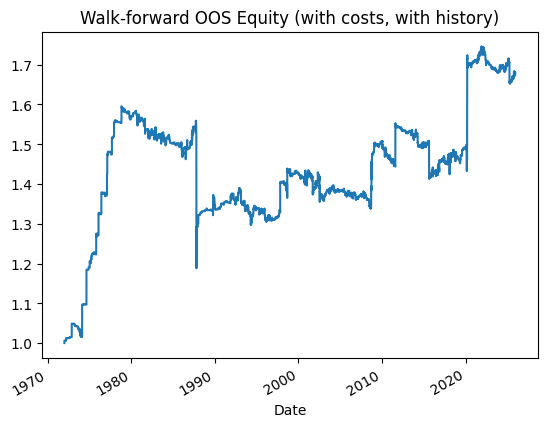

In [23]:
oos_clean = oos.fillna(0)
equity_oos = (1 + oos_clean).cumprod()

equity_oos.plot(title="Walk-forward OOS Equity (with costs, with history)")
plt.show()


In [43]:
def compute_port_ret_exit(prices_slice, window, entry_z, cost_per_side = 0.0005, return_turnover = False):
    rets = prices_slice.pct_change()
    mu = rets.rolling(window).mean()
    sigma = rets.rolling(window).std()
    z = (rets - mu) / sigma

    sma100 = prices_slice.rolling(100).mean()
    trend_ok = prices_slice > sma100
    signal = ((z < entry_z) & trend_ok).astype(int)
    raw_pos = z.apply(lambda col: build_position_from_z(col, entry_z, exit_z))
    pos = raw_pos.shift(1).fillna(0)


    turnover = pos.diff().abs().fillna(0)
    port_turnover = turnover.mean(axis=1)

    cost_per_side = 0.0005  # 5 bps
    cost = turnover * cost_per_side

    strat_rets_net = pos * rets - cost
    port_ret_net = strat_rets_net.mean(axis=1)

    strat_rets = pos * rets
    port_ret = strat_rets.mean(axis=1)
    if return_turnover:
        return port_ret_net, port_turnover
    return port_ret_net


def sharpe_from_returns(r):
    r = r.dropna()
    if r.std() == 0 or len(r) < 50:
        return -np.inf
    return (r.mean() / r.std()) * np.sqrt(252)

train_len = 504
test_len = 63

dates = prices.index
oos_returns = []
chosen_params = []
oos_turnovers = []

start = 0
while start + train_len + test_len <= len(dates):
    train_idx = dates[start : start + train_len]
    test_idx  = dates[start + train_len : start + train_len + test_len]

    train_prices = prices.loc[train_idx]
    hist_prices = prices.loc[train_idx.union(test_idx)]

    # select best params on train
    best_s = -np.inf
    best_params = None
    for window, entry_z in PARAM_GRID:
        r_train = compute_port_ret_exit(train_prices, window, entry_z)
        s = sharpe_from_returns(r_train)
        if s > best_s:
            best_s = s
            best_params = (window, entry_z)

    # apply best params on test
    window, entry_z = best_params
    r_all,t_all = compute_port_ret_exit(hist_prices, window, entry_z, return_turnover=True)
    r_test = r_all.loc[test_idx]
    t_test = t_all.loc[test_idx]
    oos_returns.append(r_test)
    oos_turnovers.append(t_test)
    chosen_params.append({"start": train_idx[0], "end": test_idx[-1], "window": window, "entry_z": entry_z, "train_sharpe": best_s})

    start += test_len  # roll forward by one test block

oos_turnover = pd.concat(oos_turnovers).sort_index()
avg_daily_turnover_oos_exit = oos_turnover.mean()
oos_exit = pd.concat(oos_returns).sort_index()
params_used = pd.DataFrame(chosen_params)

# OOS metrics
equity_oos = (1 + oos_exit.fillna(0)).cumprod()
running_max = equity_oos.cummax()
dd_oos = equity_oos / running_max - 1

sharpe_oos_exit = sharpe_from_returns(oos_exit)
max_dd_oos_exit = dd_oos.min()

sharpe_oos_exit, max_dd_oos_exit, oos_turnover.head()

(0.35284922506788063,
 -0.1221525864326759,
 Date
 1971-12-30    0.00
 1971-12-31    0.05
 1972-01-03    0.05
 1972-01-04    0.00
 1972-01-05    0.00
 dtype: float64)

In [42]:
def compute_port_ret_entry(
    prices_slice: pd.DataFrame,
    window: int,
    entry_z: float,
    cost_per_side: float = 0.0005,
    return_turnover: bool = False
):
    # 1) returns + z-score
    rets = prices_slice.pct_change()
    mu = rets.rolling(window).mean()
    sigma = rets.rolling(window).std()
    z = (rets - mu) / sigma

    # 2) entry-only signal (0/1), then shift for next-day execution
    signal = (z < entry_z).astype(int)
    pos = signal.shift(1).fillna(0)

    # 3) turnover + costs (per-side)
    turnover = pos.diff().abs().fillna(0)
    cost = turnover * cost_per_side

    # 4) net returns per asset and equal-weight portfolio
    strat_rets_net = pos * rets - cost
    port_ret_net = strat_rets_net.mean(axis=1)

    # portfolio turnover (average across tickers)
    port_turnover = turnover.mean(axis=1)

    if return_turnover:
        return port_ret_net, port_turnover
    return port_ret_net

def sharpe_from_returns(r):
    r = r.dropna()
    if r.std() == 0 or len(r) < 50:
        return -np.inf
    return (r.mean() / r.std()) * np.sqrt(252)

train_len = 504
test_len = 63

dates = prices.index
oos_returns = []
chosen_params = []
oos_turnovers = []

start = 0
while start + train_len + test_len <= len(dates):
    train_idx = dates[start : start + train_len]
    test_idx  = dates[start + train_len : start + train_len + test_len]

    train_prices = prices.loc[train_idx]
    hist_prices = prices.loc[train_idx.union(test_idx)]

    # select best params on train
    best_s = -np.inf
    best_params = None
    for window, entry_z in PARAM_GRID:
        r_train = compute_port_ret_entry(train_prices, window, entry_z)
        s = sharpe_from_returns(r_train)
        if s > best_s:
            best_s = s
            best_params = (window, entry_z)

    # apply best params on test
    window, entry_z = best_params
    r_all,t_all = compute_port_ret_entry(hist_prices, window, entry_z, return_turnover=True)
    r_test = r_all.loc[test_idx]
    t_test = t_all.loc[test_idx]
    oos_returns.append(r_test)
    oos_turnovers.append(t_test)
    chosen_params.append({"start": train_idx[0], "end": test_idx[-1], "window": window, "entry_z": entry_z, "train_sharpe": best_s})

    start += test_len  # roll forward by one test block

oos_turnover = pd.concat(oos_turnovers).sort_index()
avg_daily_turnover_oos_entry = oos_turnover.mean()
oos_entry = pd.concat(oos_returns).sort_index()
params_used = pd.DataFrame(chosen_params)

# OOS metrics
equity_oos = (1 + oos_entry.fillna(0)).cumprod()
running_max = equity_oos.cummax()
dd_oos = equity_oos / running_max - 1

sharpe_oos_entry = sharpe_from_returns(oos_entry)
max_dd_oos_entry = dd_oos.min()

sharpe_oos_entry, max_dd_oos_entry, oos_turnover.head()

(0.22274379236982128,
 -0.25534742469914995,
 Date
 1971-12-30    0.00
 1971-12-31    0.05
 1972-01-03    0.05
 1972-01-04    0.00
 1972-01-05    0.00
 dtype: float64)

In [41]:
rows = [
    {
        "variant": "Entry-only",
        "sharpe_oos": sharpe_oos_entry,
        "max_dd_oos": max_dd_oos_entry,
        "avg_daily_turnover_oos": avg_daily_turnover_oos_entry,
    },
    {
        "variant": "Entry+Exit (exit_z=-1)",
        "sharpe_oos": sharpe_oos_exit,
        "max_dd_oos": max_dd_oos_exit,
        "avg_daily_turnover_oos": avg_daily_turnover_oos_exit,
    },
]

results_table = pd.DataFrame(rows)
results_table

,variant,sharpe_oos,max_dd_oos,avg_daily_turnover_oos
0,Entry-only,0.222744,-0.255347,0.044297
1,Entry+Exit (exit_z=-1),0.352849,-0.122153,0.039267


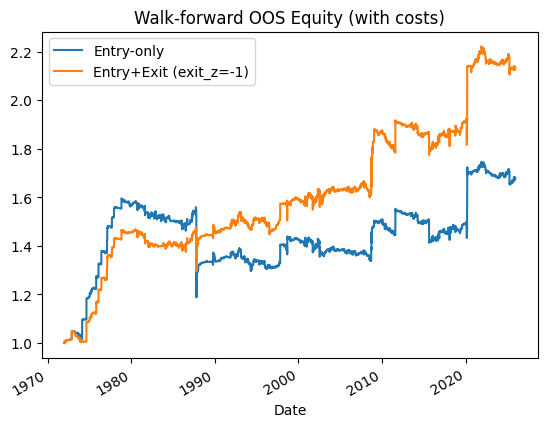

In [44]:
equity_entry = (1 + oos_entry.fillna(0)).cumprod()
equity_exit  = (1 + oos_exit.fillna(0)).cumprod()

plt.figure()
equity_entry.plot(label="Entry-only")
equity_exit.plot(label="Entry+Exit (exit_z=-1)")
plt.title("Walk-forward OOS Equity (with costs)")
plt.legend()
plt.show()
